In [1]:
DATASET_PATH = "/Users/omarhassan/Desktop/projects/gender_class/gender_data/audio_speech_actors_01-24"    # path to RAVDESS folder
GENDER_OUT = "gender_features.npz"  # output file for gender task
EMOTION_OUT = "emotion_features.npz" # output file for emotion task


In [2]:
import sys
import subprocess

subprocess.run([
    sys.executable,
    "ravdess_mfcc_pipeline.py",
    "--dataset-path", DATASET_PATH,
    "--out-features", GENDER_OUT,
    "--task", "gender"
], check=True)

CompletedProcess(args=['/Users/omarhassan/miniforge3/envs/heart_sound_env/bin/python', 'ravdess_mfcc_pipeline.py', '--dataset-path', '/Users/omarhassan/Desktop/projects/gender_class/gender_data/audio_speech_actors_01-24', '--out-features', 'gender_features.npz', '--task', 'gender'], returncode=0)

In [3]:
import numpy as np

data_g = np.load(GENDER_OUT, allow_pickle=True)
print("Gender X shape:", data_g['X'].shape, "y shape:", data_g['y'].shape)




Gender X shape: (1440, 78) y shape: (1440,)


X shape: (1440, 78)
y shape: (1440,)
Any NaNs? False Any Infs? False


,label,count
0,male,720
1,female,720


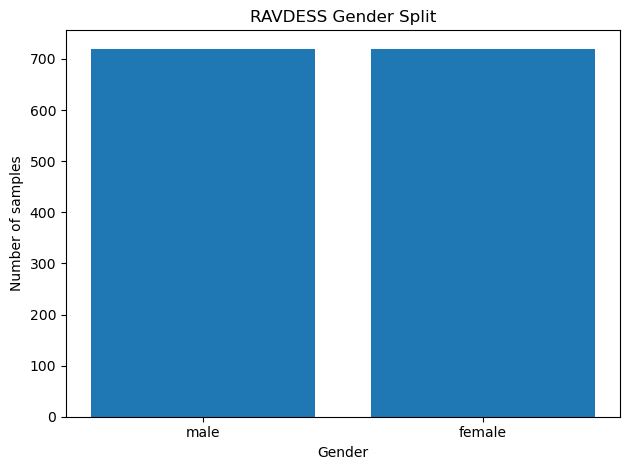

Feature means  min/max: -576.5837 / 184.97586
Feature stds   min/max: 0.01832031 / 101.77911


In [ ]:
import numpy as np
import pandas as pd # type: ignore # type: ignore
import matplotlib.pyplot as plt

# 1) Load the data
data = np.load('gender_features.npz', allow_pickle=True)
X, y = data['X'], data['y']

# 2) Check shapes
print(f'X shape: {X.shape}')   # should be (1440, 78) for RAVDESS gender
print(f'y shape: {y.shape}')

# 3) Check for NaNs/infs
print('Any NaNs?', np.isnan(X).any(), 'Any Infs?', np.isinf(X).any())

# 4) Label distribution
counts = np.bincount(y)
labels = ['male', 'female']
df = pd.DataFrame({'label': labels, 'count': counts})
display(df)

# 5) Plot the distribution
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Number of samples')
plt.title('RAVDESS Gender Split')
plt.tight_layout()
plt.show()

# 6) Feature‐value ranges
print('Feature means  min/max:', X.mean(axis=0).min(), '/', X.mean(axis=0).max())
print('Feature stds   min/max:',  X.std(axis=0).min(),  '/', X.std(axis=0).max())


In [5]:
import numpy as np
# Workaround for librosa compatibility with newer NumPy versions
np.complex = complex

In [ ]:
import matplotlib.pyplot as plt
import librosa # type: ignore # type: ignore
import librosa.display # type: ignore

In [11]:
male_files = [
    "/Users/omarhassan/Desktop/projects/gender_class/gender_data/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav",  # e.g. male calm
    "/Users/omarhassan/Desktop/projects/gender_class/gender_data/audio_speech_actors_01-24/Actor_05/03-01-03-01-01-01-05.wav"   # e.g. male happy
]
female_files = [
    "/Users/omarhassan/Desktop/projects/gender_class/gender_data/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav",  # e.g. female calm
    "/Users/omarhassan/Desktop/projects/gender_class/gender_data/audio_speech_actors_01-24/Actor_06/03-01-03-01-01-01-06.wav"   # e.g. female happy
]

In [12]:
def plot_mfcc(file_path, sr=16000, n_mfcc=13, n_fft=2048, hop_length=512):
    """
    Load an audio file, extract MFCCs, and plot the spectrogram.
    """
    y, _ = librosa.load(file_path, sr=sr)
    mfcc = librosa.feature.mfcc(
        y=y,
        sr=sr,
        n_mfcc=n_mfcc,
        n_fft=n_fft,
        hop_length=hop_length
    )
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(
        mfcc,
        x_axis='time',
        sr=sr,
        hop_length=hop_length
    )
    plt.colorbar()
    plt.title(f"MFCC – {file_path.split('/')[-1]}")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficient")
    plt.tight_layout()
    plt.show()

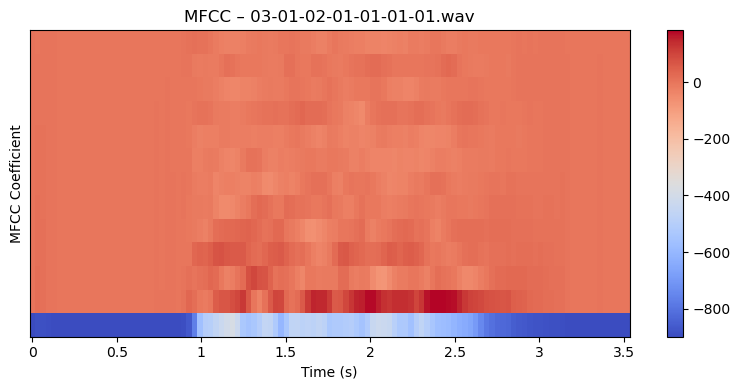

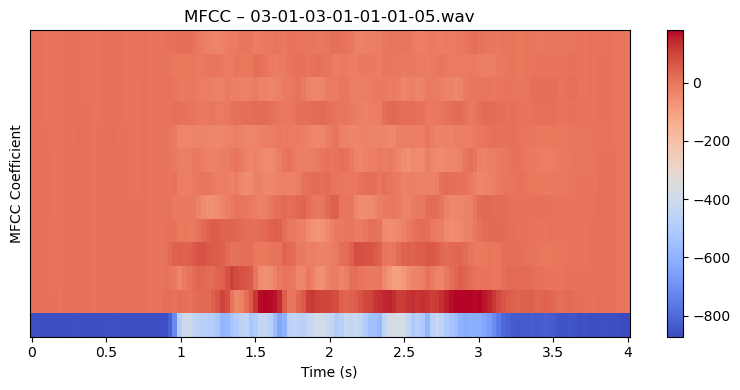

In [13]:
for fp in male_files:
    plot_mfcc(fp)

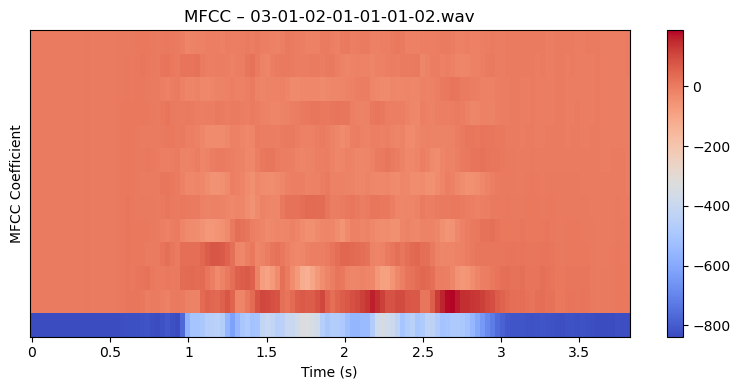

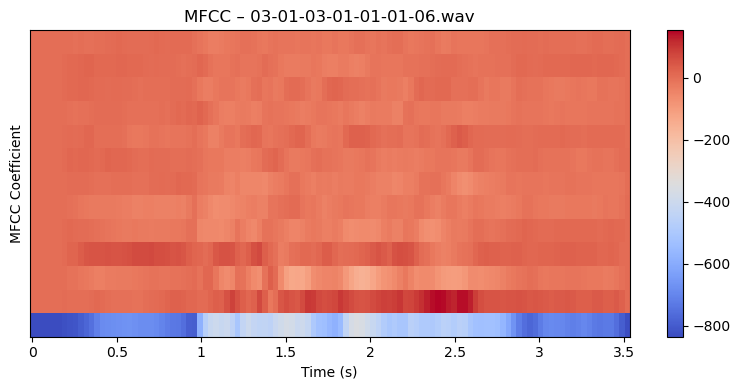

In [14]:
for fp in female_files:
    plot_mfcc(fp)

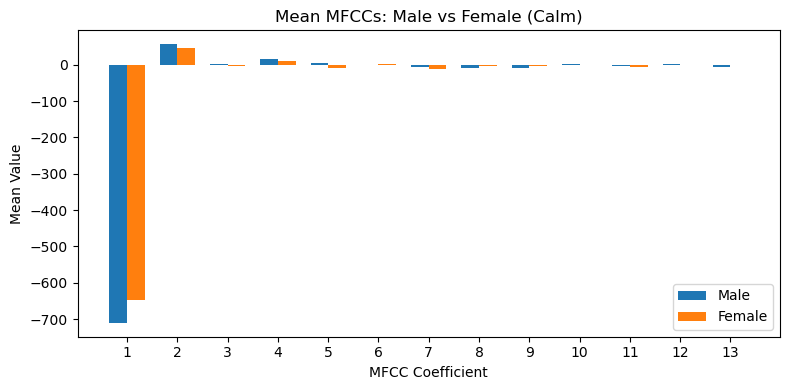

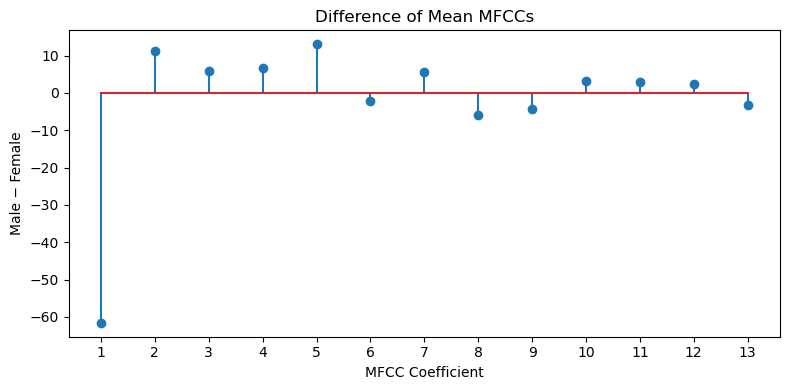

In [ ]:
import librosa # type: ignore
import numpy as np
import matplotlib.pyplot as plt

# Replace these with actual file paths
male_file   = "/Users/omarhassan/Desktop/projects/gender_class/gender_data/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav"
female_file = "/Users/omarhassan/Desktop/projects/gender_class/gender_data/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav"

def mean_mfcc(path, sr=16000, n_mfcc=13):
    y, _ = librosa.load(path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc.mean(axis=1)

# compute mean vectors
mfcc_m = mean_mfcc(male_file)
mfcc_f = mean_mfcc(female_file)

# Plot side-by-side bar chart
coeffs = np.arange(1, len(mfcc_m) + 1)
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(coeffs - width/2, mfcc_m, width, label='Male')
plt.bar(coeffs + width/2, mfcc_f, width, label='Female')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Mean Value')
plt.title('Mean MFCCs: Male vs Female (Calm)')
plt.legend()
plt.xticks(coeffs)
plt.tight_layout()
plt.show()

# Plot difference stem plot
diff = mfcc_m - mfcc_f

plt.figure(figsize=(8, 4))
plt.stem(coeffs, diff)
plt.xlabel('MFCC Coefficient')
plt.ylabel('Male − Female')
plt.title('Difference of Mean MFCCs')
plt.xticks(coeffs)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
data = np.load('gender_features.npz', allow_pickle=True)
X, y = data['X'], data['y']


In [ ]:

from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:

from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:

print("X_train:", X_train_scaled.shape, "X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape,      "y_test:", y_test.shape)
print("Train class counts:", np.bincount(y_train))
print("Test  class counts:", np.bincount(y_test))


X_train: (1152, 78) X_test: (288, 78)
y_train: (1152,) y_test: (288,)
Train class counts: [576 576]
Test  class counts: [144 144]


In [ ]:
import numpy as np
from xgboost import XGBClassifier # type: ignore # type: ignore
from sklearn.model_selection import GridSearchCV # type: ignore # type: ignore
from sklearn.metrics import make_scorer, accuracy_score, classification_report # type: ignore



In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(accuracy_score),
    cv=5,
    verbose=2,
    n_jobs=-1
)


In [27]:

grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   2.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   2.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   3.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   3.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   3.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   3.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   2.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   3.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   3.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   4.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   4.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   3.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   2.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   3.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   3.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   2.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   2.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   2.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   3.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   2.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   2.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   2.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   2.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   2.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   2.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   2.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   2.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   2.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   2.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   2.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   2.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   2.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   2.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   2.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   2.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   2.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   2.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   2.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   2.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   2.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   2.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   2.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   4.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   4.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   4.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   4.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   4.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   4.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   5.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   4.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   5.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   5.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   5.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   5.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   5.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   5.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   5.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   6.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   5.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   5.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   5.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   5.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   5.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   4.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   5.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   5.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   5.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   5.9s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   6.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   6.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   6.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   6.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   6.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   6.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   5.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   5.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   5.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   4.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   4.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   4.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   5.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   4.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   4.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   4.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   4.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   4.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   4.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s



/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lam

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.9s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.4s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   2.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   2.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   2.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   3.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   3.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   3.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   3.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   3.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   3.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.8s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   3.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   3.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   3.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   3.0s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   3.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   3.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.1s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   3.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   2.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lam

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.0s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, re

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   1.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   1.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:53:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.4s[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.5s

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   1.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   1.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   2.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   2.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   3.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.5s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   2.7s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   1.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   2.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.0s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.1s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.9s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   2.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.7s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.6s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.7s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.7s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   1.6s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_la

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, 

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.6s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.6s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.3s

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.6s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.6s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.6s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.1s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.1s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambd

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.6s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, 

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alph

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.1s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=1

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lam

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alph

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lam

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alph

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_l

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.2s

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=1, reg_lambda=1

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0, reg_l

/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10; total time=   0.5s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.4s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.2s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s
[CV] END gamma=5, learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=1, reg_lambda=10; total time=   0.3s


/Users/omarhassan/miniforge3/envs/heart_sound_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 1, 5], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 5, 10]},
             scoring=make_scorer(accuracy_score, response_method='predict'),
             verbose=2)

In [ ]:

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1}
Best CV accuracy: 0.9809222661396575


In [29]:

# %%
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['male', 'female']))


              precision    recall  f1-score   support

        male       0.98      0.99      0.99       144
      female       0.99      0.98      0.99       144

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



In [31]:
import joblib # type: ignore

# Save XGBoost model
joblib.dump(best_model, 'xgb_gender_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score # type: ignore


In [33]:

y_pred = best_model.predict(X_test_scaled)


In [34]:

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy    = accuracy_score(y_test, y_pred)
precision   = precision_score(y_test, y_pred)       # male=0 vs female=1, adjust pos_label if needed
recall      = recall_score(y_test, y_pred)          # sensitivity (female)
specificity = tn / (tn + fp)                        # true negative rate (male)
f1          = f1_score(y_test, y_pred)

print(f"Accuracy:    {accuracy:.3f}")
print(f"Precision:   {precision:.3f}")
print(f"Recall:      {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1 Score:    {f1:.3f}")


Accuracy:    0.986
Precision:   0.993
Recall:      0.979
Specificity: 0.993
F1 Score:    0.986


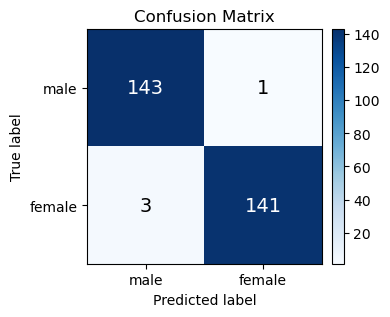

In [ ]:
import matplotlib.pyplot as plt

labels = ['male','female']
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm, cmap='Blues')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', fontsize=14, color='white' if cm[i,j]>cm.max()/2 else 'black')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()
